![](pilz.jpg)
# **Dataset: Mushrooms**

## Data Mining and Visualization - Gruppe 5

# 1. Einführung

Diese Analyse untersucht den Mushroom-Datensatz von Kaggle, der Informationen über verschiedene Pilzmerkmale enthält. Der Datensatz klassifiziert Pilze als essbar ('e') oder giftig ('p') basierend auf ihren physischen Eigenschaften.

## 1.1 Daten laden und erste Übersicht

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("mushrooms.csv", delimiter=",")
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Betrachtet man die ersten 5 Zeilen erkennt man, dass das Datenset nur aus Kategorialen Variablen besteht.
Im nächsten Schritt wird untersucht welche Spalten vorhanden sind, wie viel Einträge diese haben und ob NA Werte vorhanden sind.



In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Aufbereiten der Daten**


In [4]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]

Wie sich bei der Ausgabe der ersten 5 Zeilen gezeigt hat, bestehend die Kategorien nur aus Buchstaben, deren Übersetzung nicht immer offensichtlich sind. Daher werden Buchstaben mit den tatsächlichen Eigenschaften ersetzt.

In [5]:
#mittles nested dict und replace kann man das ganze in einem machen der "äußeste" key gibt die spalte an in der es replaced werden soll das innere paar stellt die Änderung dar
mapping = {
    'class': {'e': 'edible', 'p': 'poisonous'},

    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},

    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},

    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},

    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},

    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},

    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},

    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},

    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

mapping_de = {
    'class': {'e': 'Essbar', 'p': 'Giftig'},

    'cap-shape': {'b': 'glockenförmig', 'c': 'konisch', 'x': 'gewölbt', 'f': 'flach', 'k': 'geknöpft', 's': 'eingesunken'},
    'cap-surface': {'f': 'fasrig', 'g': 'gerillt', 'y': 'schuppig', 's': 'glatt'},
    'cap-color': {'n': 'braun', 'b': 'beige', 'c': 'zimtfarben', 'g': 'grau', 'r': 'grün', 'p': 'rosa', 'u': 'lila', 'e': 'rot', 'w': 'weiß', 'y': 'gelb'},

    'bruises': {'t': 'Druckstellen', 'f': 'keine'},
    'odor': {'a': 'mandelartig', 'l': 'anisartig', 'c': 'teerartig', 'y': 'fischig', 'f': 'faulig', 'm': 'muffig', 'n': 'kein Geruch', 'p': 'stechend', 's': 'würzig'},

    'gill-attachment': {'a': 'angewachsen', 'd': 'herablaufend', 'f': 'frei', 'n': 'ausgebuchtet'},
    'gill-spacing': {'c': 'nahstehend', 'w': 'gedrängt', 'd': 'weit'},
    'gill-size': {'b': 'breit', 'n': 'schmal'},
    'gill-color': {'k': 'schwarz', 'n': 'braun', 'b': 'beige', 'h': 'schokoladenbraun', 'g': 'grau', 'r': 'grün', 'o': 'orange', 'p': 'rosa', 'u': 'lila', 'e': 'rot', 'w': 'weiß', 'y': 'gelb'},

    'stalk-shape': {'e': 'verdickend', 't': 'verjüngend'},
    'stalk-root': {'b': 'knollig', 'c': 'keulenförmig', 'u': 'tassenförmig', 'e': 'gleichförmig', 'z': 'mit Rhizomorphen', 'r': 'verwurzelt', '?': 'fehlend'},
    'stalk-surface-above-ring': {'f': 'fasrig', 'y': 'schuppig', 'k': 'seidig', 's': 'glatt'},
    'stalk-surface-below-ring': {'f': 'fasrig', 'y': 'schuppig', 'k': 'seidig', 's': 'glatt'},
    'stalk-color-above-ring': {'n': 'braun', 'b': 'beige', 'c': 'zimtfarben', 'g': 'grau', 'o': 'orange', 'p': 'rosa', 'e': 'rot', 'w': 'weiß', 'y': 'gelb'},
    'stalk-color-below-ring': {'n': 'braun', 'b': 'beige', 'c': 'zimtfarben', 'g': 'grau', 'o': 'orange', 'p': 'rosa', 'e': 'rot', 'w': 'weiß', 'y': 'gelb'},

    'veil-type': {'p': 'Teilhülle', 'u': 'Gesamthülle'},
    'veil-color': {'n': 'braun', 'o': 'orange', 'w': 'weiß', 'y': 'gelb'},

    'ring-number': {'n': 'kein Ring', 'o': 'ein Ring', 't': 'zwei Ringe'},
    'ring-type': {'c': 'haarschleierförmig', 'e': 'beweglich', 'f': 'aufsteigend', 'l': 'groß', 'n': 'kein Ring', 'p': 'herabhängend', 's': 'gestiefelt', 'z': 'zoniert'},

    'spore-print-color': {'k': 'schwarz', 'n': 'braun', 'b': 'beige', 'h': 'schokoladenbraun', 'r': 'grün', 'o': 'orange', 'u': 'lila', 'w': 'weiß', 'y': 'gelb'},

    'population': {'a': 'reichlich', 'c': 'in Gruppen', 'n': 'zahlreich', 's': 'verstreut', 'v': 'mehrere', 'y': 'einzeln'},
    'habitat': {'g': 'Grasflächen', 'l': 'Blätter', 'm': 'Wiesen', 'p': 'Wegen', 'u': 'Städten', 'w': 'Abfallflächen', 'd': 'Wälder'}
}

df.replace(mapping_de, inplace = True)

Als nächstes wird überprüft wie viele giftige und wie viele Essbare einträge vorhanden sind


Giftige Einträge: 3916
Essbare Einträge: 4208


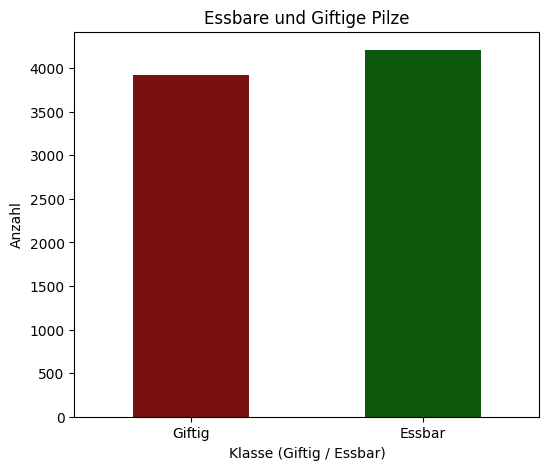

In [6]:
print(f"Giftige Einträge: {df[df['class'] == 'Giftig'].shape[0]}")
print(f"Essbare Einträge: {df[df['class'] == 'Essbar'].shape[0]}")

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='class', hue='class', palette= {'Giftig': 'darkred', 'Essbar': 'darkgreen'}, width = 0.5)
plt.title('Essbare und Giftige Pilze')
plt.xlabel('Klasse (Giftig / Essbar)')
plt.ylabel('Anzahl')
plt.show()



# Bestimmung der Unabhängigkeit

Der Chi-Quadrat Test auf Unabhängigkeit prüft, ob zwei Variablen mit hoher Wahrscheinlichkeit in Relation zueinander stehen. Je höher die Chi-Quadrat Statistik ist desto höher ist die Abhängigkeit der Variablen voneinander. Für die weitere Visualisierung wird dieser Test durchgeführt um jene Variablen darzustellen welche einen hohe Relation zu unserer Zielvariable ("class") besitzen.

Folgendes Diagramm zeigt, dass die höchste Abhängigkeit zu der zielvariable bei der Variable "odor" (Geruch) gegeben ist. Die Variablen mit der höchsten Abhängigkeit sowie mehrere mit einer geringeren Abhängigkeit werden folgenden Grafiken dargestellt. Die geringste Abhängigkeit stellt die Variable "veil type" dar diese Variable ist eine sonderfall da alle in diesem datensatz gegebenen daten bei dieser Variable dem Typ "Teilhülle" angehören und keine eintrag zum Typ "Gesamthülle" vorliegt.

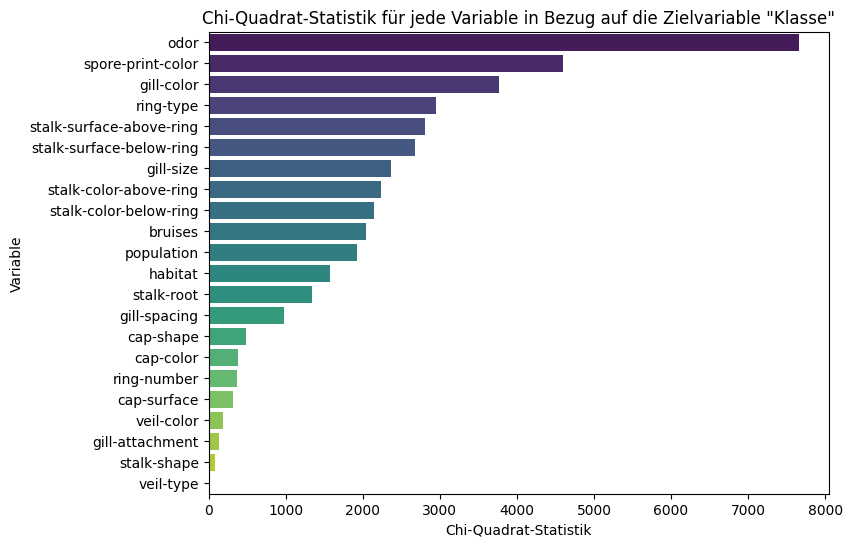

In [7]:
results = []

for column in df.columns:
    if column != "class":
        contingency_table = pd.crosstab(df[column], df["class"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        results.append((column, chi2))

results.sort(key=lambda x: x[1], reverse=True)

results_df = pd.DataFrame(results, columns=["Variable", "Chi2"])
results_df = results_df.sort_values(by='Chi2', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Chi2", y="Variable", hue= "Variable", data=results_df, palette="viridis")
plt.xlabel("Chi-Quadrat-Statistik")
plt.ylabel("Variable")
plt.title('Chi-Quadrat-Statistik für jede Variable in Bezug auf die Zielvariable "Klasse"')
plt.show()

# Darstellung von einzelnen Variablen zur Essbarkeit der Pilze

Zur Darstellung von einzelnen Variablen wurden die Kategorien "odor" (Geruch) und "spore-print-color" (Sporenabdruck Farbe) auf Grund ihrer hohen Abhängigkeit zu der Essbarkeit ausgewählt und dargestellt. Weiters wurde die Kategorie "habitat" (Wachstumsort) visuell dargestellt, um zu zeigen ob es möglich ist für Pilzsammler eine Aussagege zu treffen ob es bestimmte Gebite gibt in der eine erhöhte Anzahl an Essbaren Pilzen sammelbar ist. Die Kategorie "cap-size" (Hut Form) wurde visualisiert da diese Eigenschaft meist die erste Eigenschaft (mit der Farbe des Hutes) ist die von Sammlern wahrgenommen wird.


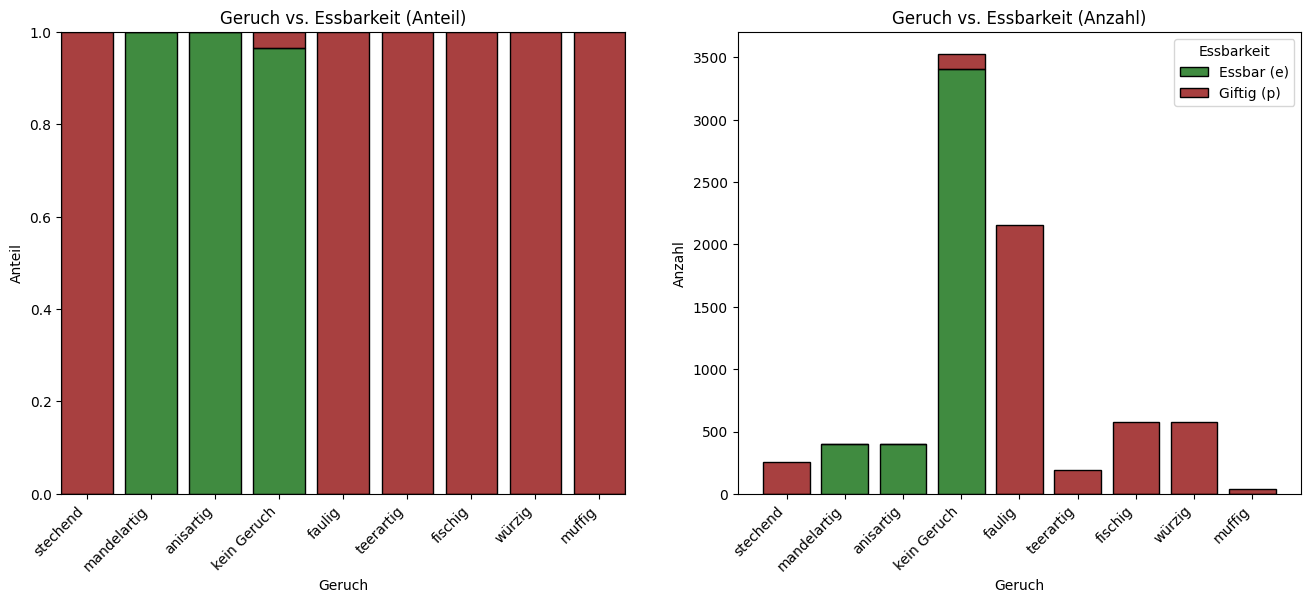

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))

sns.histplot(
    data=df,
    x='odor',
    hue='class',
    multiple='fill',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax1
)
ax1.set_title("Geruch vs. Essbarkeit (Anteil)")
ax1.set_xlabel("Geruch")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Anteil")
ax1.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"]).remove()

sns.histplot(
    data=df,
    x='odor',
    hue='class',
    multiple='stack',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax2
)
ax2.set_title("Geruch vs. Essbarkeit (Anzahl)")
ax2.set_xlabel("Geruch")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel("Anzahl")
ax2.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"])



plt.show()

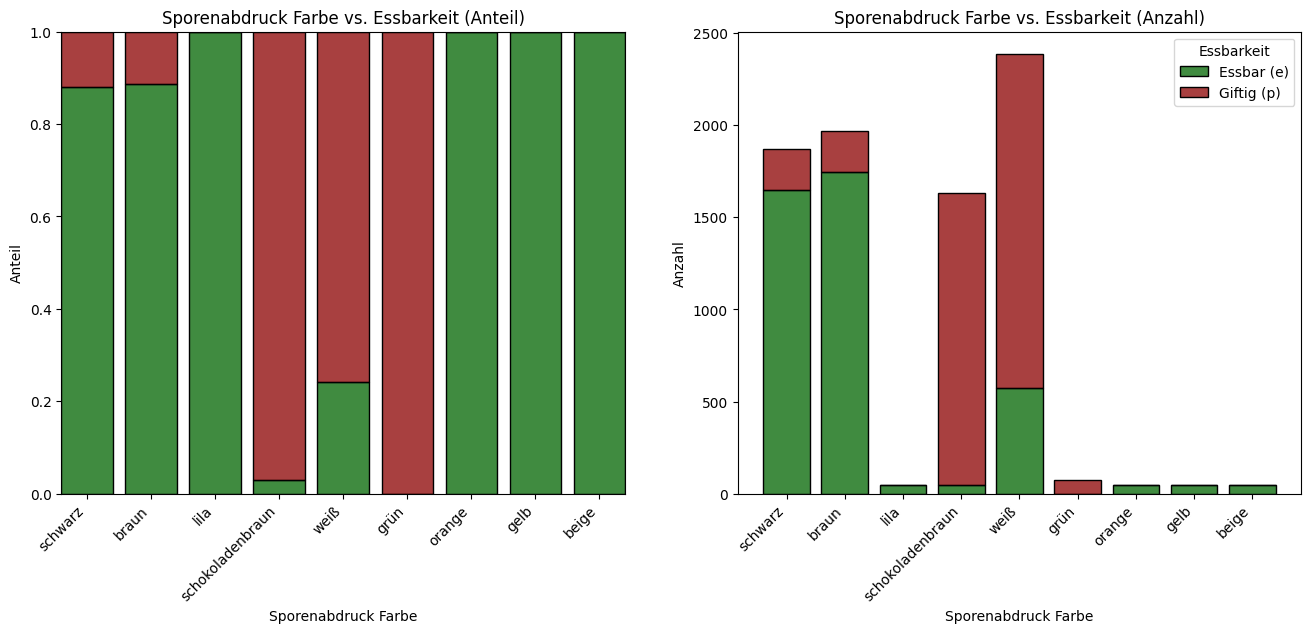

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))

sns.histplot(
    data=df,
    x='spore-print-color',
    hue='class',
    multiple='fill',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax1
)
ax1.set_title("Sporenabdruck Farbe vs. Essbarkeit (Anteil)")
ax1.set_xlabel("Sporenabdruck Farbe")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Anteil")
ax1.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"]).remove()

sns.histplot(
    data=df,
    x='spore-print-color',
    hue='class',
    multiple='stack',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax2
)
ax2.set_title("Sporenabdruck Farbe vs. Essbarkeit (Anzahl)")
ax2.set_xlabel("Sporenabdruck Farbe")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel("Anzahl")
ax2.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"])



plt.show()

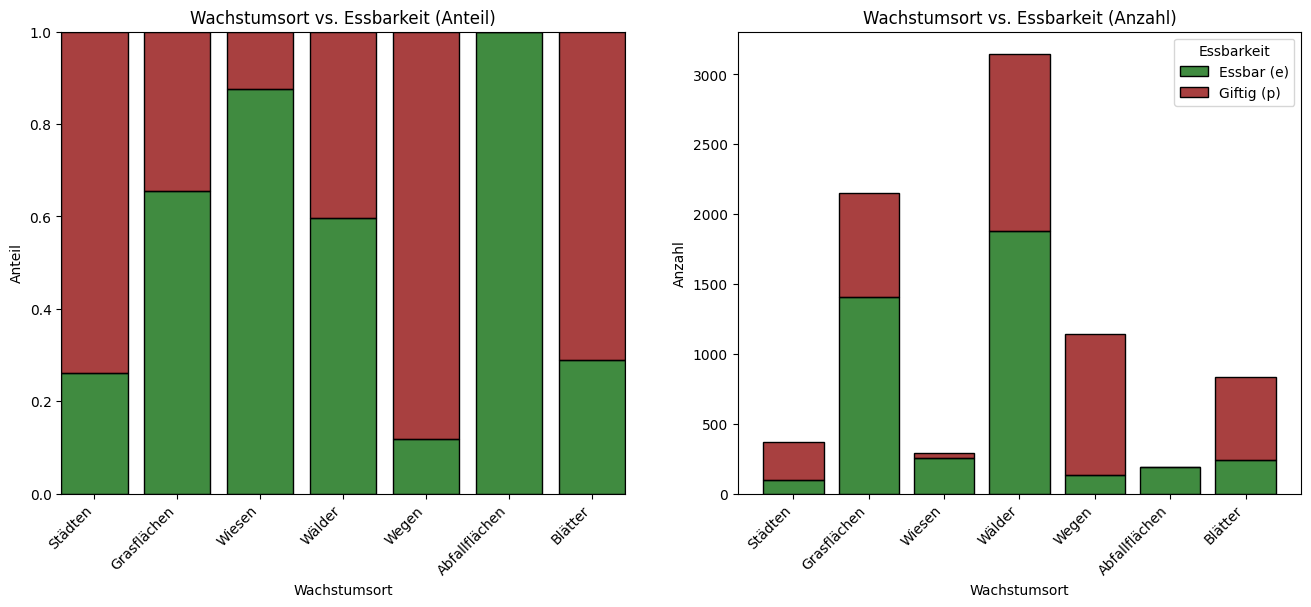

In [10]:
#Diese Auswertung find ich einfach wirklich nice, ich finde es einfach super das alle auf abfallflächen as essbar klassifiziert wurden
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))

sns.histplot(
    data=df,
    x='habitat',
    hue='class',
    multiple='fill',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax1
)
ax1.set_title("Wachstumsort vs. Essbarkeit (Anteil)")
ax1.set_xlabel("Wachstumsort")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_ylabel("Anteil")
ax1.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"]).remove()

sns.histplot(
    data=df,
    x='habitat',
    hue='class',
    multiple='stack',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax2
)
ax2.set_title("Wachstumsort vs. Essbarkeit (Anzahl)")
ax2.set_xlabel("Wachstumsort")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_ylabel("Anzahl")
ax2.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"])



plt.show()

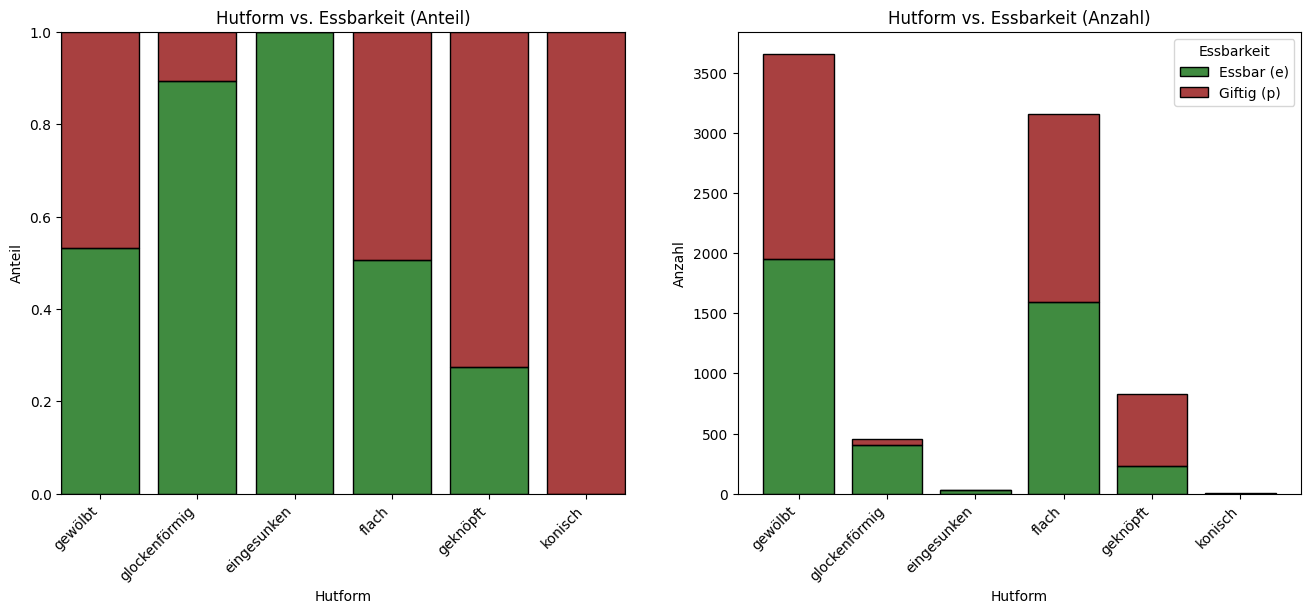

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 6))

sns.histplot(
    data=df,
    x='cap-shape',
    hue='class',
    multiple='fill',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax1
)
ax1.set_title("Hutform vs. Essbarkeit (Anteil)")
ax1.set_xlabel("Hutform")
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_ylabel("Anteil")
ax1.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"]).remove()

sns.histplot(
    data=df,
    x='cap-shape',
    hue='class',
    multiple='stack',
    palette={'Essbar': 'darkgreen', 'Giftig': 'darkred'},
    shrink=0.8,
    ax=ax2
)
ax2.set_title("Hutform vs. Essbarkeit (Anzahl)")
ax2.set_xlabel("Hutform")
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=45, ha="right")
ax2.set_ylabel("Anzahl")
ax2.legend(title="Essbarkeit", labels=["Essbar (e)", "Giftig (p)"])



plt.show()

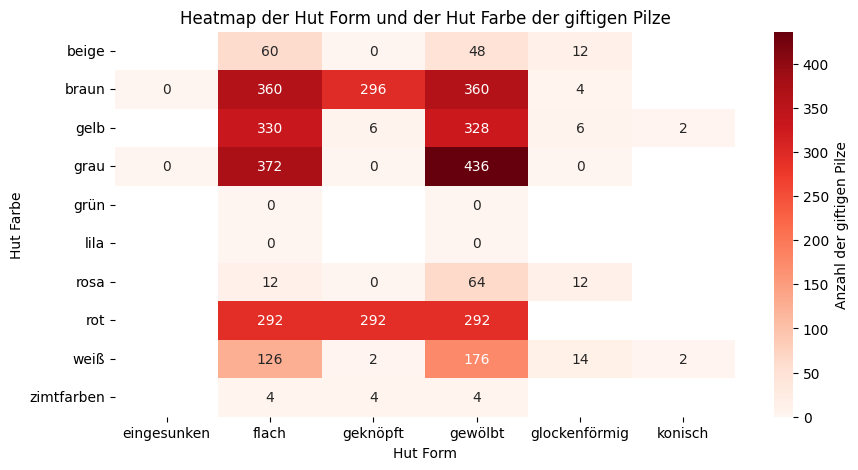

In [12]:
gill_pivot = df.pivot_table(index='cap-color', columns='cap-shape', values='class',
                              aggfunc=lambda x: (x=='Giftig').sum())

plt.figure(figsize=(10, 5))
sns.heatmap(gill_pivot, annot=True, fmt=".0f", cmap='Reds', cbar_kws={'label': 'Anzahl der giftigen Pilze'})
plt.title('Heatmap der Hut Form und der Hut Farbe der giftigen Pilze')
plt.xlabel('Hut Form')
plt.ylabel('Hut Farbe')
plt.show()

Die Grafik zeigt, dass es sich bei Pilzen mit der Hutform flach, geknöpft oder gewölbt und den Farben Rot oder Braun, um eine bestimmte Anzahl von giftigen Pilzen handelt. Bei den Kombinationen bei welchen der Wert 0 ist, handelt es sich um essbare Pilze und dort wo kein Wert vorhanden ist deutet dies auf eine nicht existente Kombination hin.  

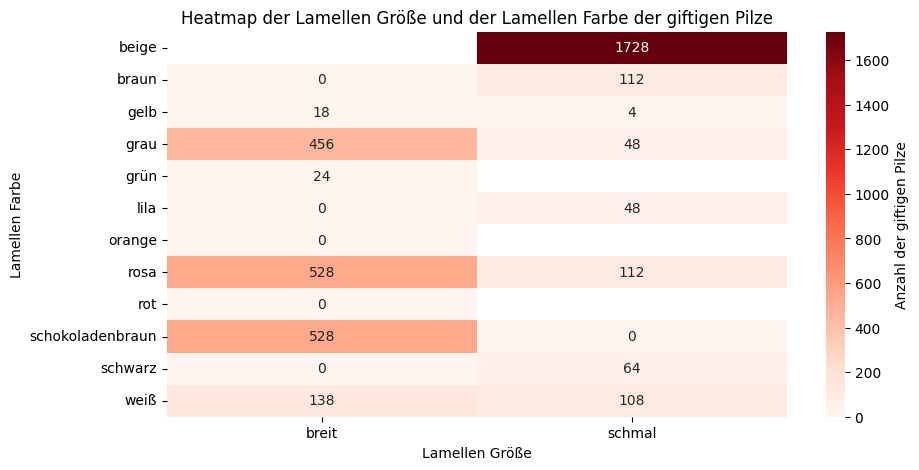

In [13]:
gill_pivot = df.pivot_table(index='gill-color', columns='gill-size', values='class',
                              aggfunc=lambda x: (x=='Giftig').sum())

plt.figure(figsize=(10, 5))
sns.heatmap(gill_pivot, annot=True, fmt=".0f", cmap='Reds', cbar_kws={'label': 'Anzahl der giftigen Pilze'})
plt.title('Heatmap der Lamellen Größe und der Lamellen Farbe der giftigen Pilze')
plt.xlabel('Lamellen Größe')
plt.ylabel('Lamellen Farbe')
plt.show()

Aus der Grafik ist abzulesen, dass die meisten Pilze mit der Lamellen Form Schmal und der Farbe beige giftig sind. Wenn der Pilz breit und eine bestimmte Farbe hat, handelt es sich um essbare Pilze.

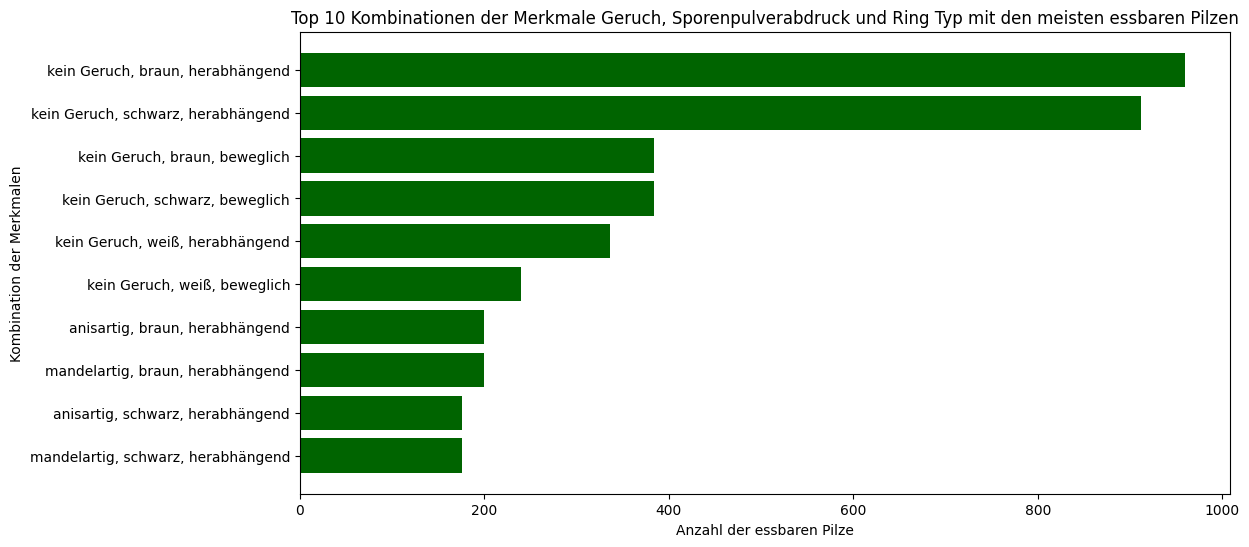

In [14]:
edible_df = df[df['class'] == 'Essbar']

grouped_df = edible_df.groupby(['odor', 'spore-print-color', 'ring-type']).size().reset_index(name='count')

top_combinations = grouped_df.sort_values(by="count",ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_combinations.apply(lambda x: f"{x['odor']}, {x['spore-print-color']}, {x['ring-type']}", axis=1), top_combinations['count'], color="darkgreen")
plt.xlabel('Anzahl der essbaren Pilze')
plt.ylabel('Kombination der Merkmalen')
plt.title('Top 10 Kombinationen der Merkmale Geruch, Sporenpulverabdruck und Ring Typ mit den meisten essbaren Pilzen')
plt.gca().invert_yaxis()



plt.show()

Aus dem Plot kann man ableiten, dass die meisten essbaren Pilzen geruchslos, braun/schwarz und herabhängend sind.  Im Gegensatz dazu haben Pilze mit folgenden Eigenschaften: anis- oder mandelartiger Geruch, schwarz und herabhängend eine geringere Wahrscheinlichkeit essbar zu sein.

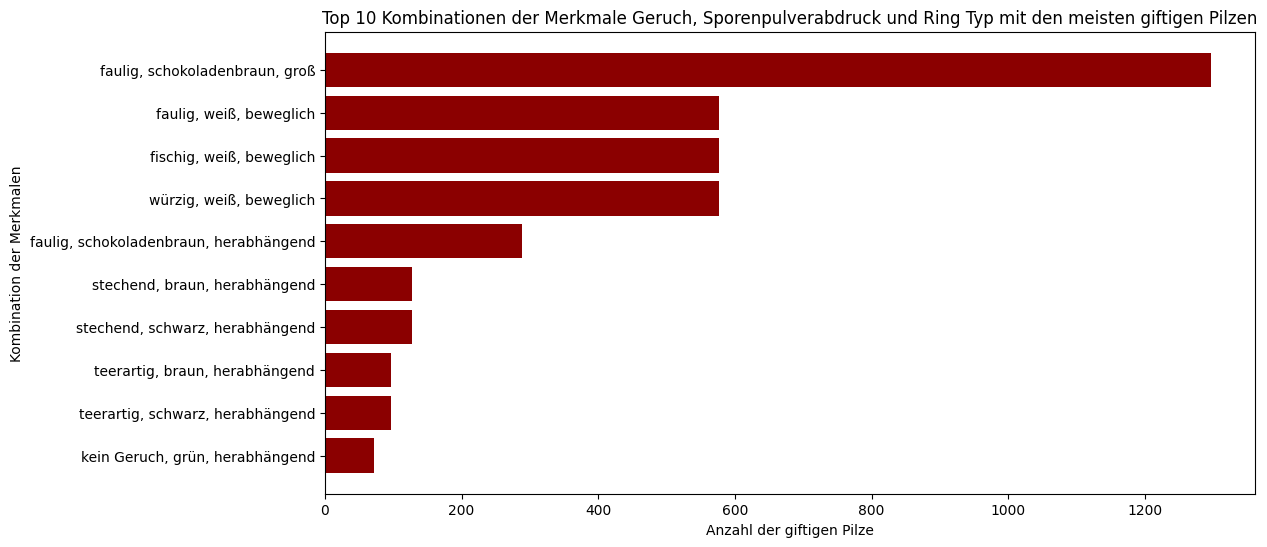

In [15]:
edible_df = df[df['class'] == 'Giftig']

grouped_df = edible_df.groupby(['odor', 'spore-print-color', 'ring-type']).size().reset_index(name='count')

top_combinations = grouped_df.sort_values(by="count",ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_combinations.apply(lambda x: f"{x['odor']}, {x['spore-print-color']}, {x['ring-type']}", axis=1), top_combinations['count'], color="darkred")
plt.xlabel('Anzahl der giftigen Pilze')
plt.ylabel('Kombination der Merkmalen')
plt.title('Top 10 Kombinationen der Merkmale Geruch, Sporenpulverabdruck und Ring Typ mit den meisten giftigen Pilzen')
plt.gca().invert_yaxis()
plt.show()

Die Ergebnisse zeigen, dass die meisten Pilze, welche faulig riechen, schokoladenbraun und groß sind, mit einer hohen Wahrscheinlichkeit als giftig einzuordnen sind.

## PCA des Datensets

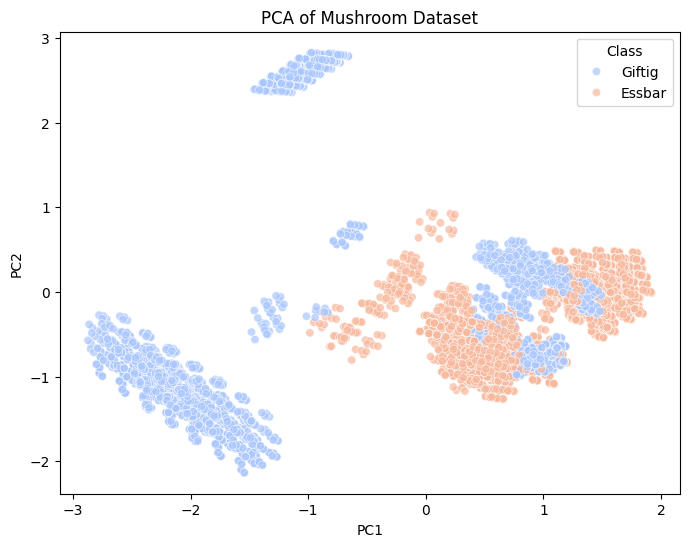

In [16]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df.drop(columns=["class"]))
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(df.drop(columns=["class"]).columns))
encoded_df["class"] = df["class"].apply(lambda x: 1 if x == 'Giftig' else 0)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df.drop(columns=['class']))
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


pca_df['class'] = encoded_df['class'].map({1: 'Giftig', 0: 'Essbar'})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('PCA of Mushroom Dataset')
plt.legend(title='Class', loc='upper right')
plt.show()

Die PCA (Principal Component Analysis) verwendet einen Scatterplot um die Verteilung der essbaren und giftigen Pilze in einem reduziertem, zweidimensionalen Raum darzustellen, anstatt alle Merkmale gleichzeitig zu zeigen, um eine Informationsüberflutung entgegen zu kommen.

Die Parameter werden dabei in die Merkmale PC1 und PC2 reduziert, was die Visualisierung und Interpretation der Daten erheblich erleichtert. Dabei ist aber zu beachten, dass gleiche Abstände zwischen Clustern auf der PC1 Achse eine größere Varianz aufweisen, als Abstände auf der PC2 Achse.

Um diesen PCA-Plot zu erstellen wurden zuerst auch alle kategoriellen Variablen in Dummy-Variablen in numerischer Form umgewandelt.

In PCA Diagramm des Mushroom Datensets werden beide Klasse, essbar (orange) und giftig (blau) gezeigt, die weitgehend voneinander getrennt sind, bis auf den gemischten Cluster bei 1,0.

Des Weiteren kann man wiederkehrende Muster in den Clustern erkennen. Das ist dadurch zu erklären, dass das Datenset nicht nur auf Messungen von realen Pilzen beruht, sondern ein signifikanter Teil des Datensets von realen Messungen extrapoliert wurde, und so "hypothetische" Pilze zeigen. Dies ist besonders schön bei den Clustern -2,-1 und -1, 3 zu sehen.





---


# 4. Schlussfolgerungen

Basierend auf unserer explorativen Datenanalyse können wir folgende Haupterkenntnisse festhalten:

1.  **Klassenverteilung:**
    -   Der Datensatz ist relativ ausgewogen zwischen essbaren und giftigen Pilzen
2.  **Wichtigste Merkmale:**
    -   Der Geruch (odor) ist einer der stärksten Indikatoren für die Giftigkeit
    -   Nach dem Geruch sind Sporenabdruck sowie Lamellenfarbe starke Indikatoren auf die Essbarkeit eines Pilzes
    -   Stieltyp (Stalk Type) und Hüllentyp (Veil Type) dürften so gut wie keinen Einfluss auf die Essbarkeit eines Pilzes haben
3.  **Datenqualität:**
    -   Keine fehlenden Werte im Datensatz
    -   Alle Variablen sind kategorisch
    -   Gut strukturierte und saubere Daten (alle Kategorien in den richtigen Klassen, keine unbekannten Kategorien)

# 5. Empfehlungen

1.  **Für Pilzsammler:**
    -   *Dieses Datenset/Auswertung nicht verwenden, aufgrund Extrapolation hypothetischer Pilze*
    -   Besondere Aufmerksamkeit sollte dem Geruch gewidmet werden
    -   Kombinationen bestimmter Merkmale können stark auf Giftigkeit hinweisen
    -   Junge Pilze haben oft eine andere Lamellenfarbe als ältere. Zum Beispiel sind die Lamellen des Champignons anfangs rosa und werden später dunkelbraun, während sie bei anderen Pilzen weiß oder cremefarben bleiben. Daher **VORSICHT** bei der Farbe!
    -   Der Wachstumsort der Pilze ist kaum ausschlaggebend für die Essbarkeit bzw. Giftigkeit eines Pilzes
2.  **Für weitere Analysen:**
    -   Auch wenn der Wachstumsort per se keinen Einfluss auf die Essbarkeit bzw. Giftigkeit eines Pilzes hat, können ökologische Ansprüche, wie Bodenart und pH-Wert, Baumarten und Mykorrhiza, Feuchtigkeit, Temperatur und Jahreszeit, Substrattyp sowie Lichtverhältnisse das Wachstum von Pilzarten beeinflussen und dadurch essbare bzw. giftige Pilze bevorzugen
    -   Es wurden nur makroskopische Merkmale behandelt, daher wären DNA Analysen, Toxoizitätsanalysen, mikroskopische Merkmale oder Pilzreaktionen auf chemische Substanzen interessant
    -   Historische und Kulturelle Bedeutung: Bestimmte Pilze haben kulturelle und medizinische Bedeutungen (z. B. der Shiitake oder Reishi in der asiatischen Medizin). Informationen über traditionelle Verwendung und kulturelle Bedeutung könnten ebenfalls einen interessanten Blickwinkel hinzufügen.
    -   Weitere Untersuchung der Merkmalskombinationen könnte interessant sein
    -   Sammlung zusätzlicher numerischer Merkmale könnte wertvoll sein